<a href="https://githubtocolab.com/borislevant/python4ml/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Classification

[![scikit-learn logo](./img/scikit-learn-logo-small.png)](https://scikit-learn.org/stable/)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
%matplotlib inline


We already saw (in the Matplotlib notebook) the example of using the Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis[[source:WIkipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)]

Today we will use a new popular dataset: Palmer Archipelago (Antarctica) penguin dataset appears to be a drop in replacemnt for the same. It is a great intro dataset for data exploration & visualization. Let's import the dataset and explore it to understand it better.
source: @allison_horst https://github.com/allisonhorst/penguins

Our goal in this notebook will be to classify the penguins into three types, according to different measurements

![](./img/penguins_small.png)


## Understanding the dataset

In [4]:
df = pd.read_csv('./data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The dataset consists of 7 columns. 

* **species**: penguin species (Chinstrap, Adélie, or Gentoo)
* **culmen_length_mm**: culmen length (mm)
* **culmen_depth_mm**: culmen depth (mm)
* **flipper_length_mm**: flipper length (mm)
* **body_mass_g**: body mass (g)
* **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* **sex**: penguin sex

### What are culmen length & depth?
The culmen is "the upper ridge of a bird's beak" 

![](./img/culmen_depth.png)


### What are flippers?
Penguins wings are called flippers. They are flat, thin, and broad with a long, tapered shape and a blunt, rounded tip

![](./img/penguins_body_parts.jpg)

In [6]:
print(df.shape)

(344, 7)


In [7]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## Correlation of numerical parameters

``Correlation`` measures the linear relationship between two variables. Higher correlation of features with the target feature indicates possible higher importance of the feature for our model. 

Negative correlation means features increase or decrease in values in opposite directions on a number line. If one feature increases, the other feature decreases, when they have negative correlation. Positive correlation means features decrease or increase in values together.


Correlation:


<AxesSubplot: >

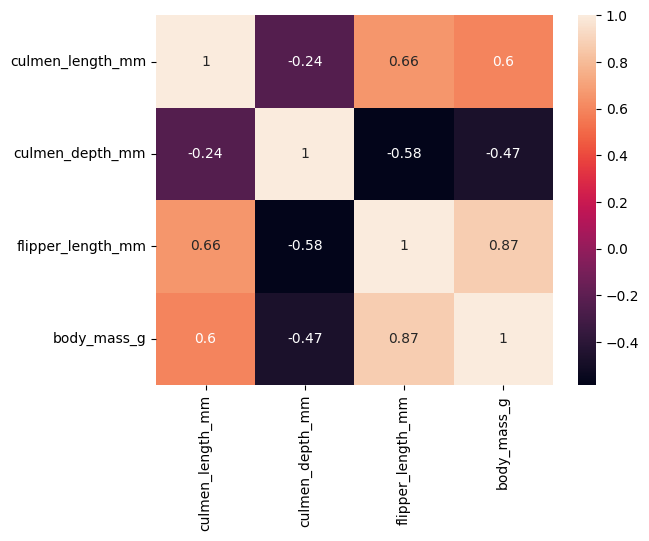

In [8]:
print('Correlation:')
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Missing values

In the previous work on regression we dealt with NaN values by deleting the rows. This time we would like to substitute the values with some estimates. We use the ``SimpleImputer`` class to substitute the *NaN* values. We have a few strategies:

* ``mean`` - replace missing values using the mean along each column. Can only be used with numeric data.
* ``median`` - replace missing values using the median along each column. Can only be used with numeric data.
* ``most_frequent`` - replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
* ``constant`` - replace missing values with fill_value. Can be used with strings or numeric data.


In [9]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent') # strategy can also be mean or median 
df.loc[:, :] = imputer.fit_transform(df)
df.head(5)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Another possibility is to use the ``fillna`` function of *Pandas*
``` 
df.fillna( method ='ffill')
```
fills the NaN values with the previous values of the DataFrame


## Cleaning the data

Looking to the unique values of the categorical data we observe strange values that we want to clean before proceed. We first find the column, and decide to substitute the missing value with ``Female`` label

In [11]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [12]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [13]:
df.at[336,'sex'] = 'FEMALE'

## Different ways to visualize the data

### Number of Species

We can count the number of unique values in the columns by using ``value_counts`` function. It returns the Series object with the count of each value


In [14]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

We can visualize it with the different kind of plots:


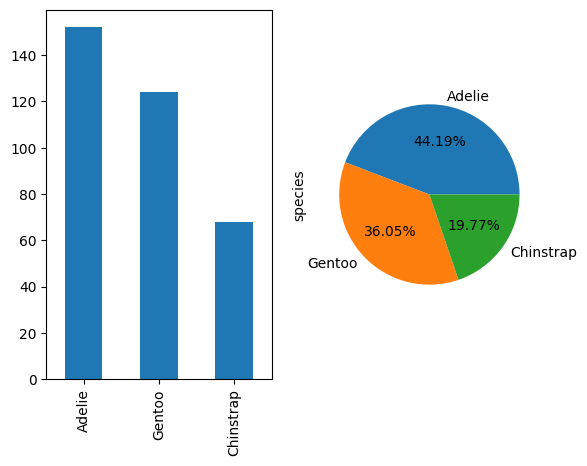

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0] = df['species'].value_counts().plot(kind='bar', ax=ax[0])
ax[1] = df['species'].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])

### Scatterplot 

The scatter plot is used to display the relationship between variables. Let’s see the scatter plot of culmen lengths and depths by penguin species. From the scatter plot, you can see how the species differ from each other.

Text(0.5, 1.0, 'Culmenl Length vs Culmen Depth')

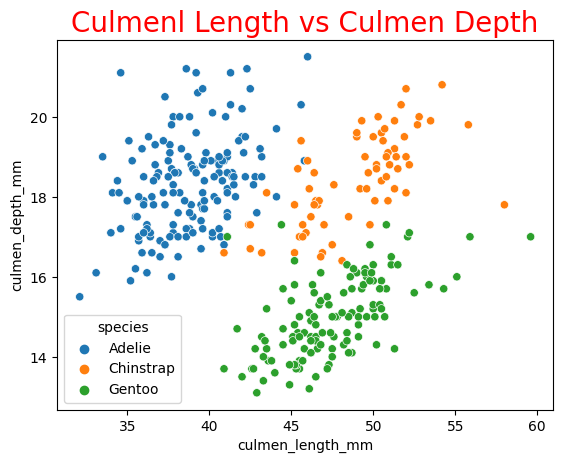

In [16]:
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", data=df, hue="species")
plt.title("Culmenl Length vs Culmen Depth", size=20, color="red")

### Histogram

The histogram plot shows the distribution of the data. You can use the histogram plot to see the distribution of one or more variables. Now let’s see the histogram of the flipper length using the histplot function. You can use the hue parameter to see the histograms of categories.

Text(0.5, 1.0, 'Flipper Length')

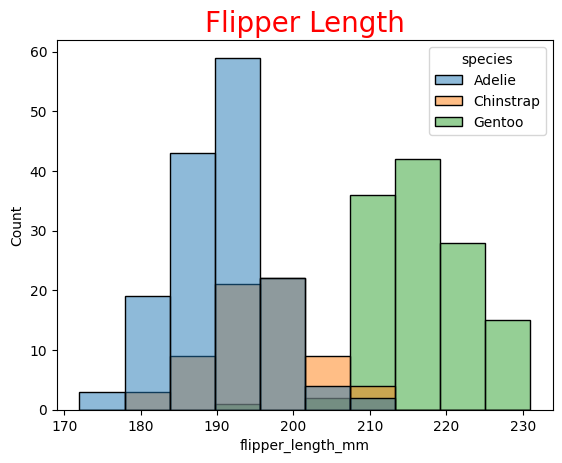

In [17]:
sns.histplot(x = "flipper_length_mm", data = df, hue = "species")
plt.title("Flipper Length", size=20, color="red")

### Barplot

A bar plot represents an estimate of the central tendency for a numeric variable with the height of each rectangle. Let’s see the bar plot showing the flipper lengths of penguin species. By default, the bars are calculated based on the mean of the values. You can use another statistic instead of the mean using the estimator parameter. Let me use the hue parameter to see the flipper lengths of the species by sex.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

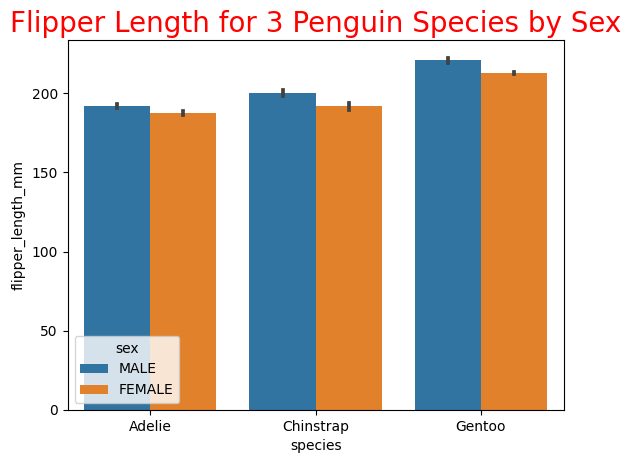

In [18]:
sns.barplot(x = "species", y = "flipper_length_mm", data =df, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

### Boxplot 

The box plot is used to compare the distribution of numerical data between levels of a categorical variable. Let’s see the distribution of flipper length by species. You can use the hue parameter to see a boxplot of flipper lengths of species by sex.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

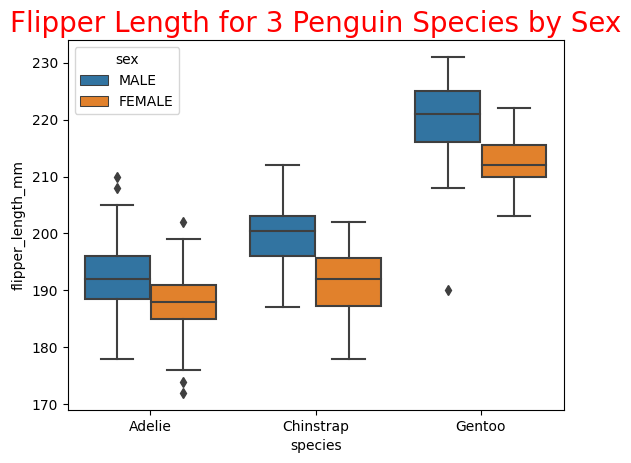

In [19]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =df, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

### Violinplot

You can think of the violin plot as a box plot. This plot is used to compare the distribution of numerical values among categorical variables. Let’s see the violin plot of flipper length.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

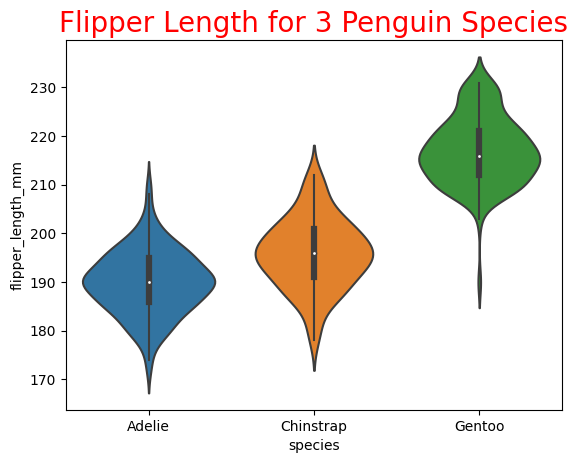

In [20]:
sns.violinplot(x = "species", y = "flipper_length_mm", data = df)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

# Scatterplot
The scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

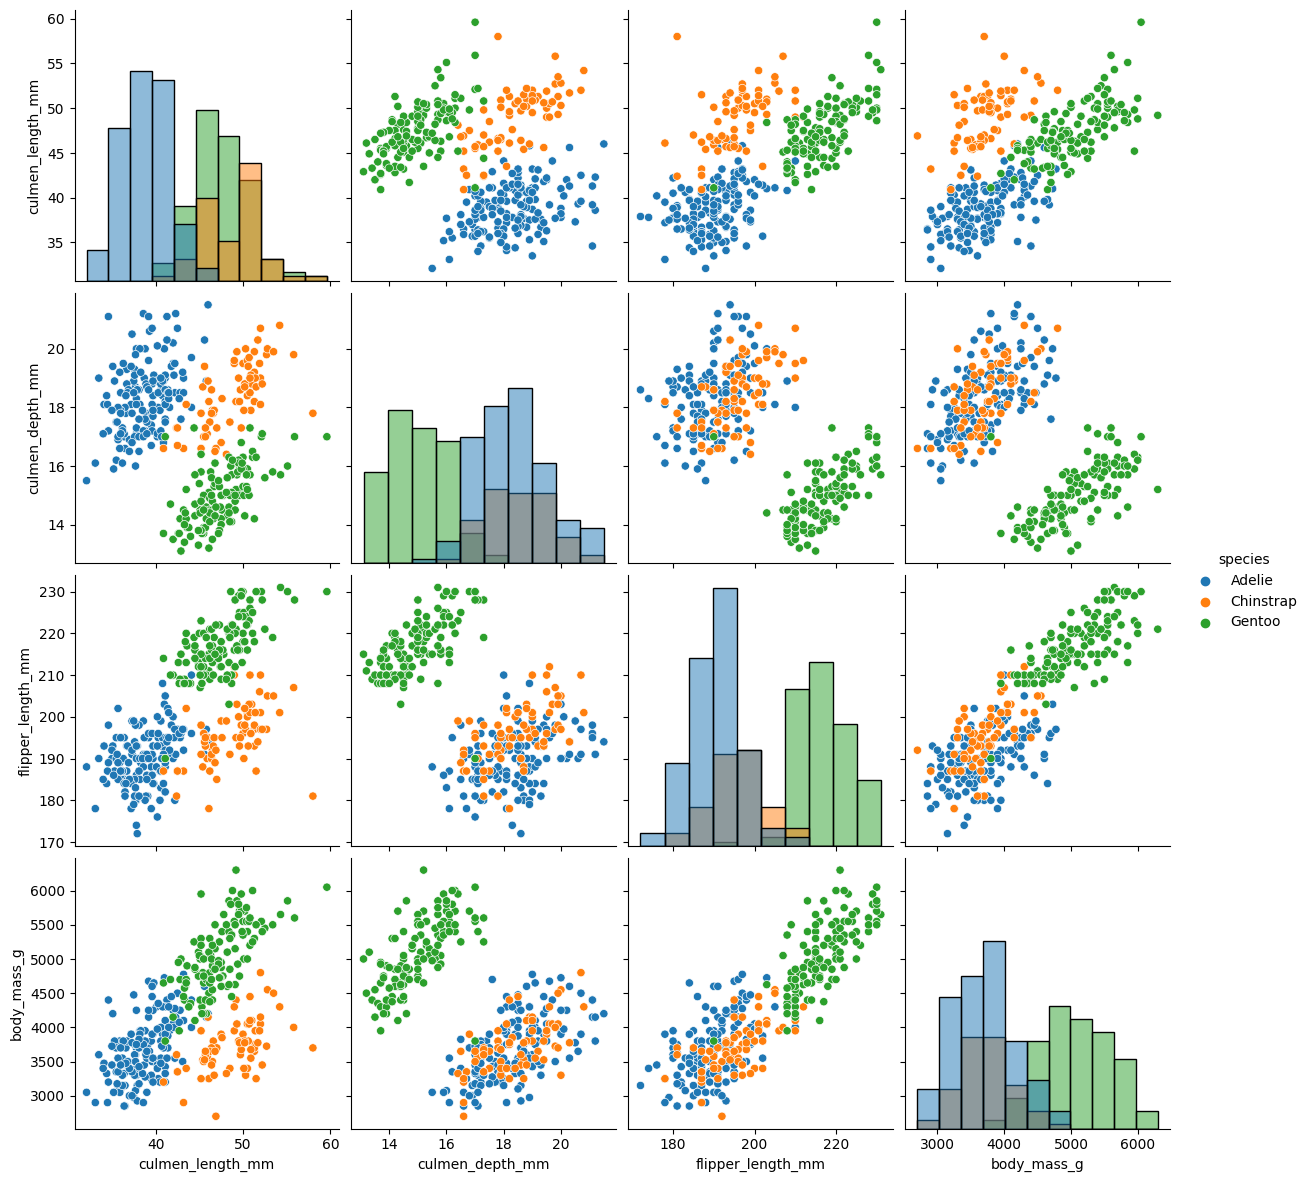

In [21]:
sns.pairplot(df, hue="species", height=3, diag_kind="hist")

## K-Nearest Neighbours Classification

It is a **supervised learning algorithm** which can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

With the given data, KNN can classify new, unlabelled data by analysis of the ***k number of the nearest data points***.

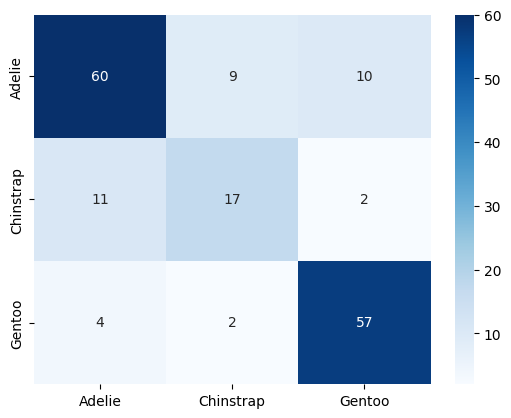

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# We need to split data for supervised learning models
target = df.species.values
X_train, X_test, y_train, y_test = train_test_split(df[numerical_columns].values, target, test_size=0.50, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)

labels = df.species.unique()
ax = sns.heatmap(confusion_matrix(y_test, preds_knn), annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)


We can compute the accuracy of the predictions by simply counting the number of correclty predicted labels

In [23]:
def accuracy(y, pred):
    return np.mean(y==pred)

print(f'Accuracy of the k=1 kNN classification={accuracy(y_test, preds_knn)}')

Accuracy of the k=1 kNN classification=0.7790697674418605


Now we compute the best k-value for our kNN regression

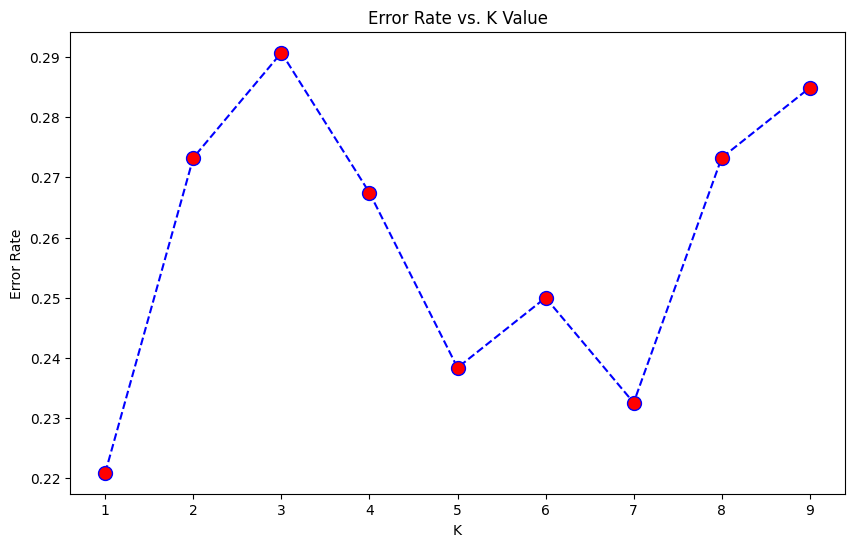

In [24]:
error_rate=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

We observe that the best accuracy for the regression we get for the k=1 or k=2. 

## Scaling the data

We will rescale the data and see if we can improve the result. To do the scaling we use the ``StandardScaler`` class of the sklearn

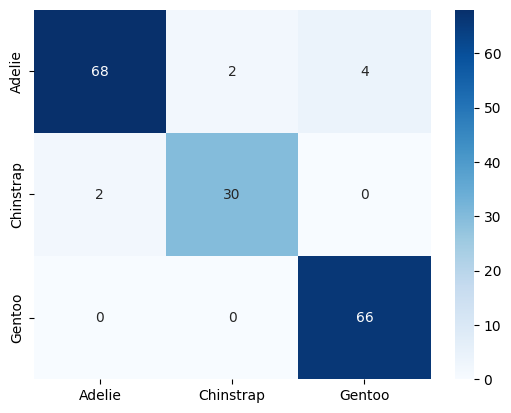

In [25]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
dfd = df[numerical_columns]
scaler = StandardScaler()
scaler.fit(dfd)
df_scaled = scaler.transform(dfd)

# We need to split data for supervised learning models
target = df.species.values
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.50)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)

labels = df.species.unique()
ax = sns.heatmap(confusion_matrix(y_test, preds_knn), annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)


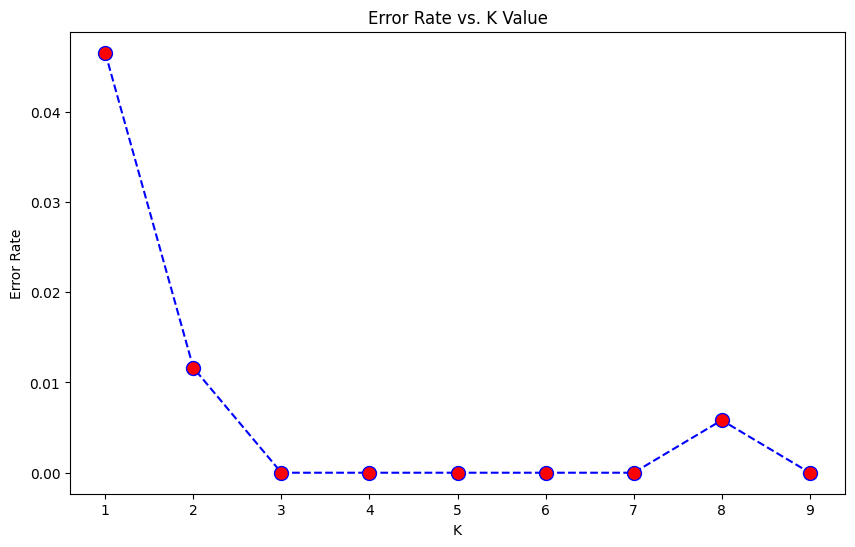

In [26]:
error_rate=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

We get much better results with the Normalized features

## Excercise 1

Remember that in our model we used only numerical values. However, we can take into account also the ``sex`` feature. Please,
* Convert the ``sex`` categorical feature to the numerical feature using the OrdinalEncoder class
* Build the kNN model on all the features and check it performance
* Find the optimal k

# References

- Scikit-learn [supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html).
- [Tuning meta-parameters](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) with cross validation.
- [One of the best notebooks for ML](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook)

# Futher exercise

- [Regression with a linear model](../exercises/linear-model.ipynb)
- [Classification with a logistic model](../exercises/logistic-tennis.ipynb)